# Predicting Flight Delays

---

In [1]:
# General Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# R1.1 Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

#R1.2 Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#R1.3 Imports
from sklearn.ensemble import RandomForestClassifier


## Data Preperation

Little data preperation is needed for these models as the initial cleaning is perfect for the needs. There will just be different subsets for each.


In [2]:
df = pd.read_csv("../data/ORD_11_21-11-22_model.csv")

In [3]:
# test = True # this is a temporary flag so it can run quickly
# if test:
#     df = df.iloc[0:1001]

## Logistic Regression (2 Classes)

In [4]:
# Two class subset
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DestAirportSeqID', 'DepDelay', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime',
 'CRSArrTime', 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['ArrDel15']

In [5]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)


In [6]:
fit = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight={0:15, 1:85}, random_state=15).fit(x_train, y_train)

In [7]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

Text(0.5, 1.0, 'Arrival Delay Confusion Matrix (Logistic Regression)')

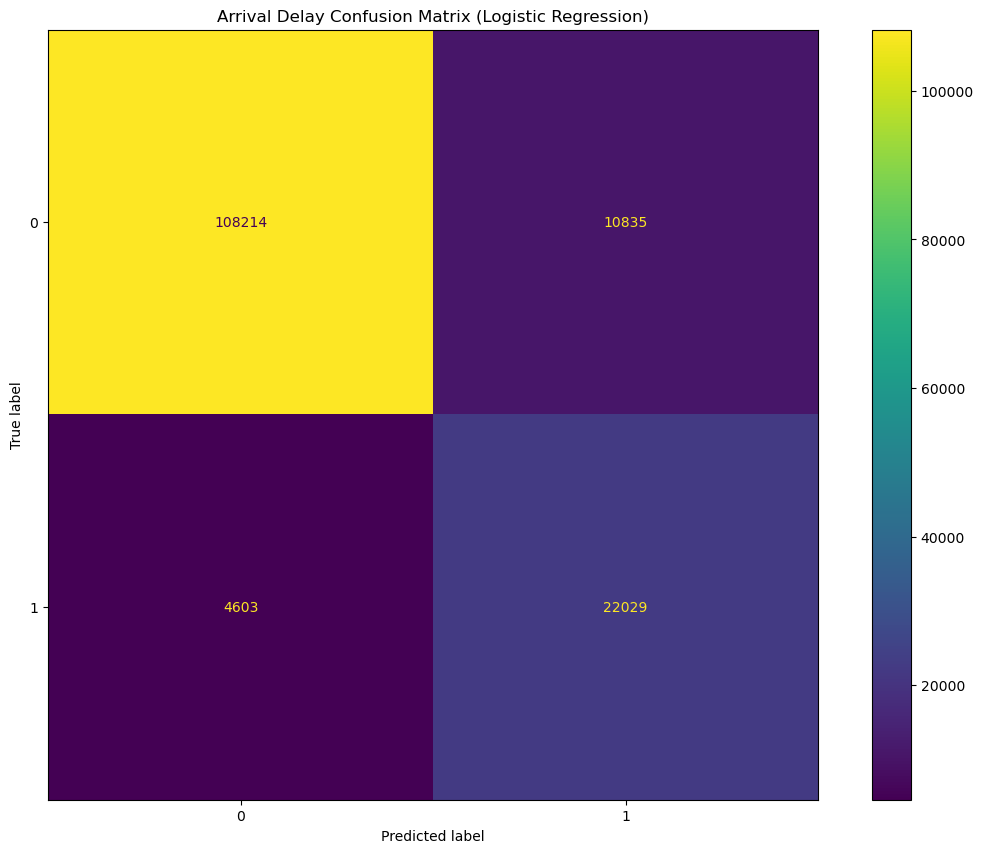

In [8]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Arrival Delay Confusion Matrix (Logistic Regression)")

In [9]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")
print(f"Precision of Model: {precision_score(y_test, y_pred)}")
print(f"Recall of Model: {recall_score(y_test, y_pred)}")

Accuracy of Model: 0.8940287340147308
Precision of Model: 0.6703079357351509
Recall of Model: 0.8271628116551517


AUC Score: 0.9393948137290824


Text(0.5, 1.0, 'Arrival Delay ROC Curve (Random Forrest Decision Tree)')

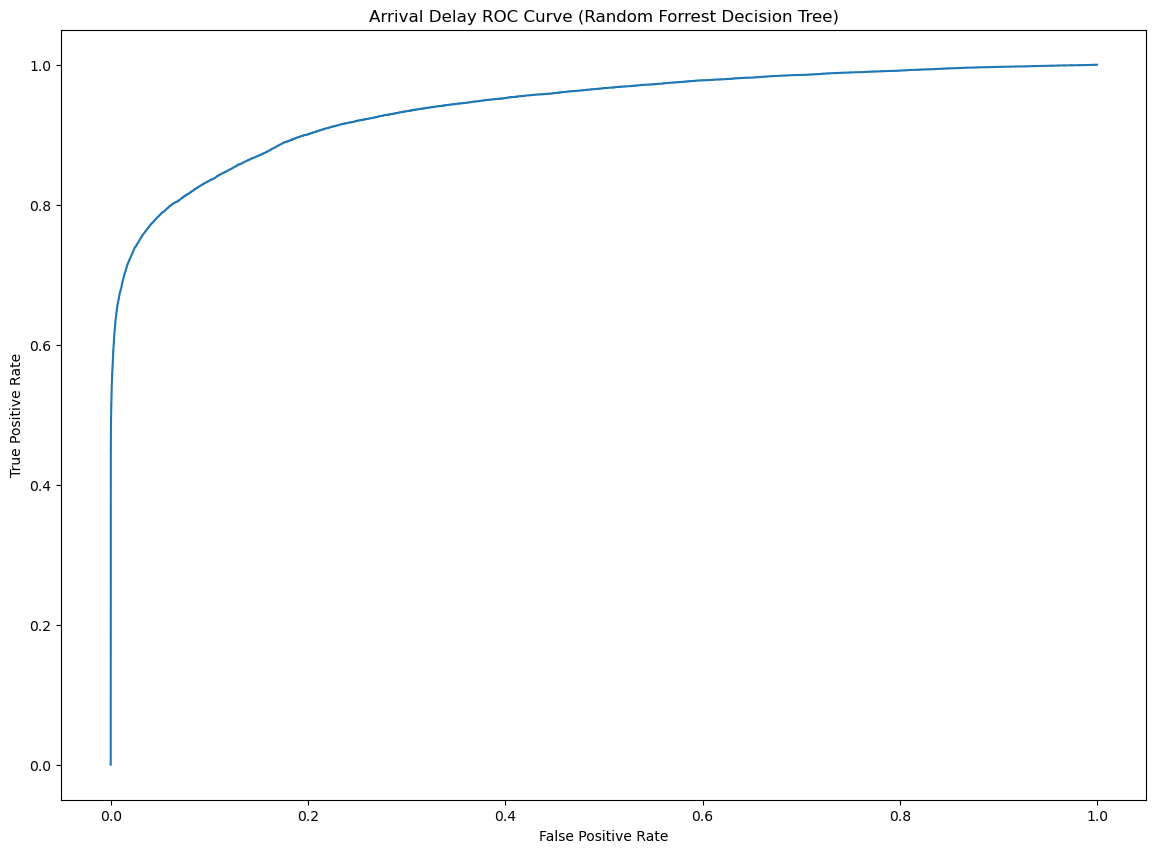

In [10]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print(f"AUC Score: {auc}")

ax1.plot(fpr, tpr)
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.set_title("Arrival Delay ROC Curve (Random Forrest Decision Tree)")

Text(0.5, 1.0, 'Arrival Delay Precision Vs. Recall (Logistic Regression)')

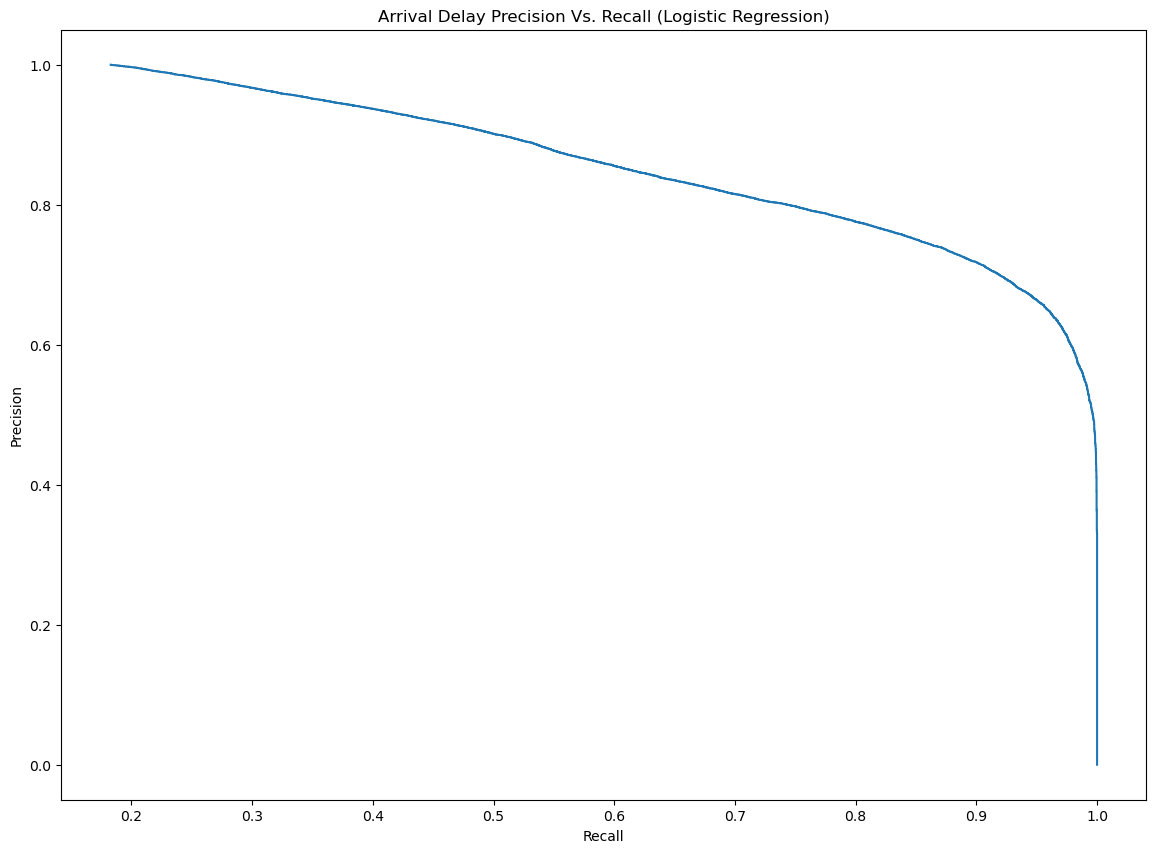

In [11]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
prec, recall, _ = precision_recall_curve(y_test, y_prob)

ax1.plot(prec, recall)
ax1.set_ylabel('Precision')
ax1.set_xlabel('Recall')
ax1.set_title("Arrival Delay Precision Vs. Recall (Logistic Regression)")

## Logistic Regression (Multiple Classes)

In [12]:
# Multi class subset **overwriting variables**
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime',
 'CRSArrTime', 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['ArrivalDelayGroups']

In [13]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [14]:
# fit = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight={0:15, 1:85}, random_state=15).fit(x_train, y_train)
fit = LogisticRegression(solver='sag', max_iter=10000, multi_class='multinomial').fit(x_train, y_train)

In [15]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

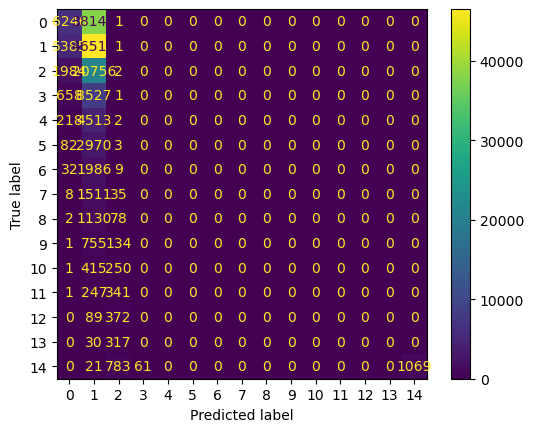

In [16]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot()

In [17]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")

Accuracy of Model: 0.3694991110714506


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.43      0.14      0.21     44389
        -1.0       0.36      0.90      0.52     51898
         0.0       0.00      0.00      0.00     22742
         1.0       0.00      0.00      0.00      9186
         2.0       0.00      0.00      0.00      4733
         3.0       0.00      0.00      0.00      3055
         4.0       0.00      0.00      0.00      2027
         5.0       0.00      0.00      0.00      1554
         6.0       0.00      0.00      0.00      1210
         7.0       0.00      0.00      0.00       890
         8.0       0.00      0.00      0.00       666
         9.0       0.00      0.00      0.00       589
        10.0       0.00      0.00      0.00       461
        11.0       0.00      0.00      0.00       347
        12.0       1.00      0.55      0.71      1934

    accuracy                           0.37    145681
   macro avg       0.12      0.11      0.10    145681
weighted avg       0.27   

c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forrest Decision Tree

In [19]:
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime', 'CRSArrTime',
 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['ArrivalDelayGroups']

In [20]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [21]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2)
df_x, df_y = oversample.fit_resample(df_x, df_y)

In [22]:
rfc = RandomForestClassifier(random_state=15).fit(x_train, y_train)

In [23]:
rfc_pred = rfc.predict(x_test)

In [24]:
print(f"Accuracy of Model: {accuracy_score(y_test, rfc_pred)}")

Accuracy of Model: 0.6025288129543317


In [25]:
print(classification_report(y_test, y_pred))

c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        -2.0       0.30      0.10      0.15     44338
        -1.0       0.36      0.87      0.51     51993
         0.0       0.17      0.02      0.03     22582
         1.0       0.03      0.00      0.00      9170
         2.0       0.00      0.00      0.00      4795
         3.0       0.00      0.00      0.00      3181
         4.0       0.00      0.00      0.00      2084
         5.0       0.00      0.00      0.00      1528
         6.0       0.00      0.00      0.00      1156
         7.0       0.00      0.00      0.00       916
         8.0       0.00      0.00      0.00       726
         9.0       0.00      0.00      0.00       511
        10.0       0.00      0.00      0.00       473
        11.0       0.00      0.00      0.00       340
        12.0       0.01      0.01      0.01      1888

    accuracy                           0.35    145681
   macro avg       0.06      0.07      0.05    145681
weighted avg       0.25   

c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Arrival Delay Group Confusion Matrix (Random Forrest Decision Tree)')

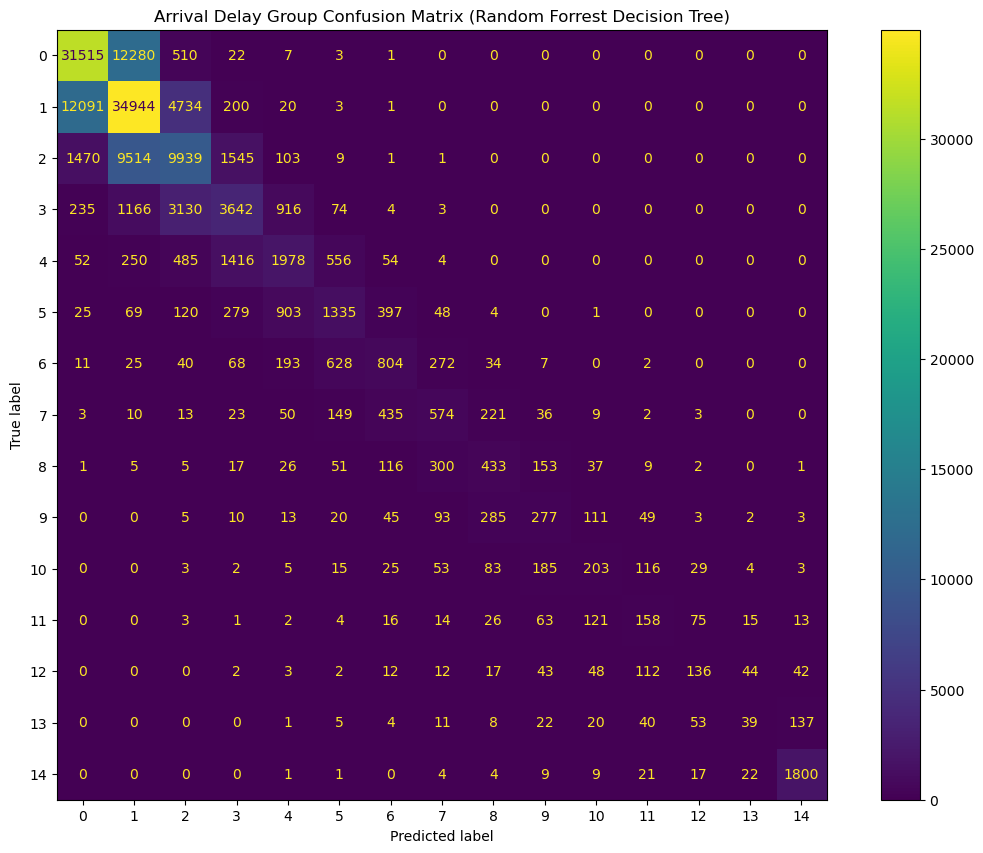

In [26]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, rfc_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Arrival Delay Group Confusion Matrix (Random Forrest Decision Tree)")

Text(0.5, 1.0, 'Random Forest Variable Importance')

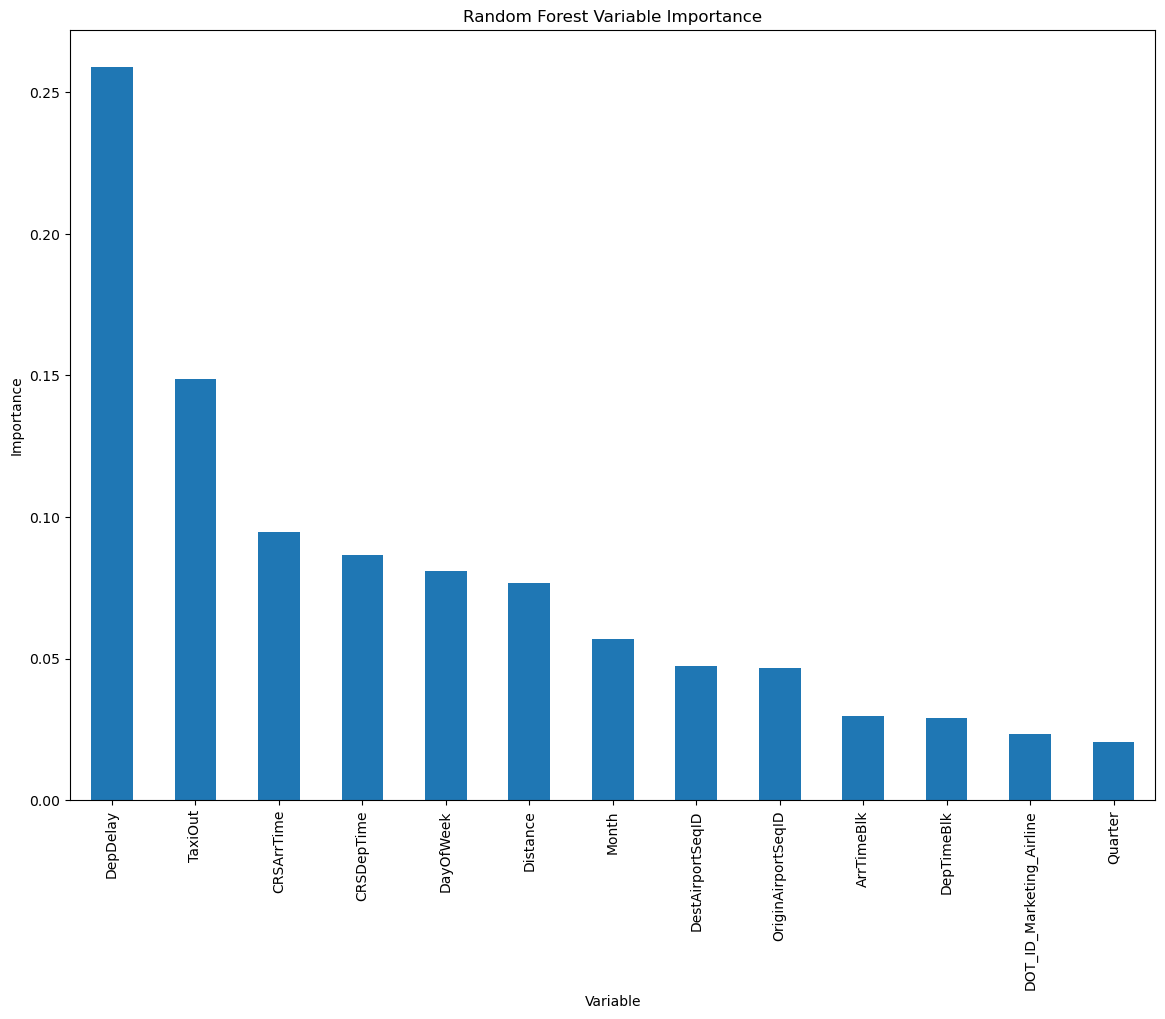

In [28]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
feature_importance = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_importance.plot.bar(ax=ax1)
ax1.set_xlabel("Variable")
ax1.set_ylabel("Importance")
ax1.set_title("Random Forest Variable Importance")